<a href="https://colab.research.google.com/github/KiranVarghese25/Deep-learning-lab/blob/main/DL_lab3_2348525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt


In [1]:
def rev(w):

  return 0.5 * w**2 - 30 * w + 100

def m(f, w_init, l_rate, moment, numiteration):

  w = w_init
  v = 0
  w_previous = [w]
  for _ in range(numiteration):
    g = f(w)

    v = moment * v - l_rate * g

    w += v

    w_previous.append(w)

  return w_previous

w_init = 20
l_rate = 0.1
moment = 0.9
numiteration = 3

w_previous = m(rev, w_init, l_rate, moment, numiteration)

print("no of iteration")
for i, w in enumerate(w_previous):
  print(f"{i+1}\t\t${w:.2f}")

cost = w_previous[-1]
print(f"cost needed for makreting: ${cost:.2f}")



no of iteration
1		$20.00
2		$50.00
3		$92.00
4		$-27.40
cost needed for makreting: $-27.40


In [4]:
#Loading the dataset
data=pd.read_csv("/content/Heart_Disease_Prediction.csv")
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
#Checking for null values
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [10]:
data=pd.get_dummies(data, drop_first=True)
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [12]:
#Splitting the dataset
X=data.drop(columns=['Heart Disease_Presence'])
y=data['Heart Disease_Presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
regularization_types=['L1', 'L2', 'ElasticNet']
regularization_strengths=[0.1, 0.01, 0.001]

for reg_type, reg_strength in zip(regularization_types, regularization_strengths):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(reg_strength)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)



In [14]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
auc = roc_auc_score(y_test, model.predict(X_test))


2/2 [==============================] - 0s 9ms/step


In [15]:
print(f"{reg_type} Regularization Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", cm)
print("AUC:", auc)

ElasticNet Regularization Results:
Accuracy: 0.7407407407407407
Precision: 0.6129032258064516
Recall: 0.9047619047619048
F1 Score: 0.7307692307692307
Confusion Matrix: [[21 12]
 [ 2 19]]
AUC: 0.8080808080808082


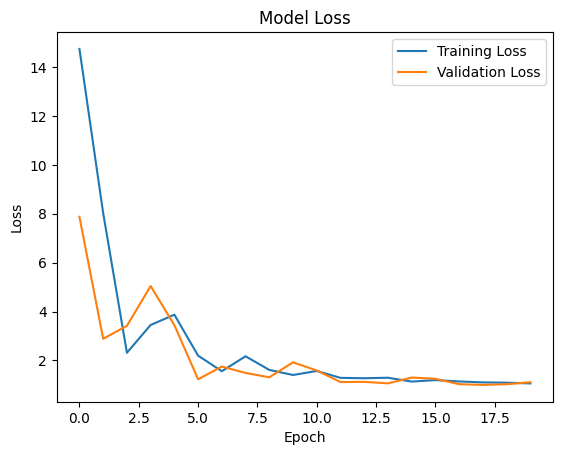

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

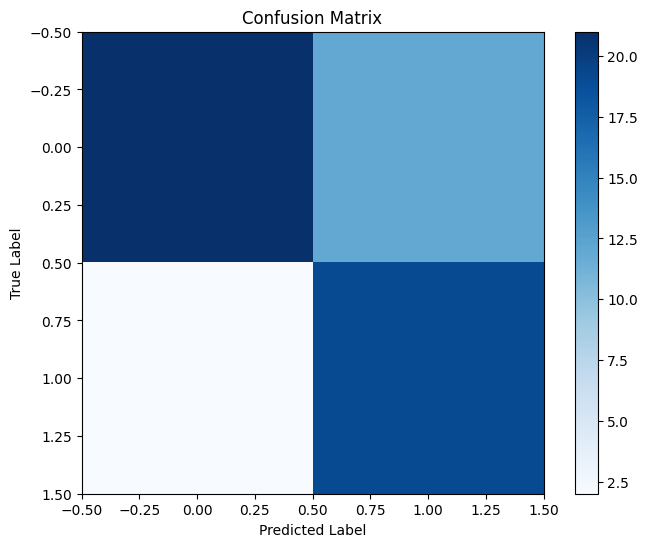

In [17]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()